# **SALARY PREDICTION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Set/salaries_clean.csv')

In [ ]:
salary = data.copy()
salary.head(2)

,index,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58
1,1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58


In [ ]:
salary.info()
print("\n")
salary.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1655 non-null   int64  
 1   salary_id                  1655 non-null   int64  
 2   employer_name              1651 non-null   object 
 3   location_name              1655 non-null   object 
 4   location_state             558 non-null    object 
 5   location_country           792 non-null    object 
 6   location_latitude          792 non-null    float64
 7   location_longitude         792 non-null    float64
 8   job_title                  1655 non-null   object 
 9   job_title_category         1655 non-null   object 
 10  job_title_rank             425 non-null    object 
 11  total_experience_years     1608 non-null   float64
 12  employer_experience_years  1608 non-null   float64
 13  annual_base_pay            1651 non-null   float

index                           0
salary_id                       0
employer_name                   4
location_name                   0
location_state               1097
location_country              863
location_latitude             863
location_longitude            863
job_title                       0
job_title_category              0
job_title_rank               1230
total_experience_years         47
employer_experience_years      47
annual_base_pay                 4
signing_bonus                 323
annual_bonus                  319
stock_value_bonus             402
comments                     1363
submitted_at                    0
dtype: int64

In [ ]:
categorical = salary.select_dtypes(include = 'object')

for i in categorical:
    salary.drop([i], axis = 1, inplace = True)

salary.isnull().sum()

index                          0
salary_id                      0
location_latitude            863
location_longitude           863
total_experience_years        47
employer_experience_years     47
annual_base_pay                4
signing_bonus                323
annual_bonus                 319
dtype: int64

In [ ]:
salary.drop(['location_latitude', 'location_longitude', 'index', 'salary_id'], axis = 1, inplace = True)
salary.isnull().sum()

total_experience_years        47
employer_experience_years     47
annual_base_pay                4
signing_bonus                323
annual_bonus                 319
dtype: int64

In [ ]:
# salary['location_latitude'].fillna(salary['location_latitude'].median(), inplace = True)
# salary['location_longitude'].fillna(salary['location_longitude'].median(), inplace = True)
salary['total_experience_years'].fillna(salary['total_experience_years'].median(), inplace = True)
salary['employer_experience_years'].fillna(salary['employer_experience_years'].median(), inplace = True)
salary['annual_base_pay'].fillna(salary['annual_base_pay'].median(), inplace = True)
salary['signing_bonus'].fillna(salary['signing_bonus'].median(), inplace = True)
salary['annual_bonus'].fillna(salary['annual_bonus'].median(), inplace = True)


In [ ]:
salary.isnull().sum()

total_experience_years       0
employer_experience_years    0
annual_base_pay              0
signing_bonus                0
annual_bonus                 0
dtype: int64

In [ ]:
salary.head(2)

,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
0,13.0,2.0,125000.0,5000.0,0.0
1,15.0,8.0,65000.0,0.0,5000.0


In [ ]:
# # --------------------------LABEL ENCODE--------------------------
# # The Machine Learning Algorithm doesn't understand text. So we turn texts columns to numbers
# salary['location_name'] = lb.fit_transform(salary['location_name'])
# salary['job_title'] = lb.fit_transform(salary['job_title'])
# salary['job_title_category'] = lb.fit_transform(salary['job_title_category'])
# salary['employer_name'] = lb.fit_transform(salary['employer_name'])
# salary['stock_value_bonus'] = lb.fit_transform(salary['stock_value_bonus'])

# salary.head()

In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_experience_years     1655 non-null   float64
 1   employer_experience_years  1655 non-null   float64
 2   annual_base_pay            1655 non-null   float64
 3   signing_bonus              1655 non-null   float64
 4   annual_bonus               1655 non-null   float64
dtypes: float64(5)
memory usage: 64.8 KB


In [ ]:
data

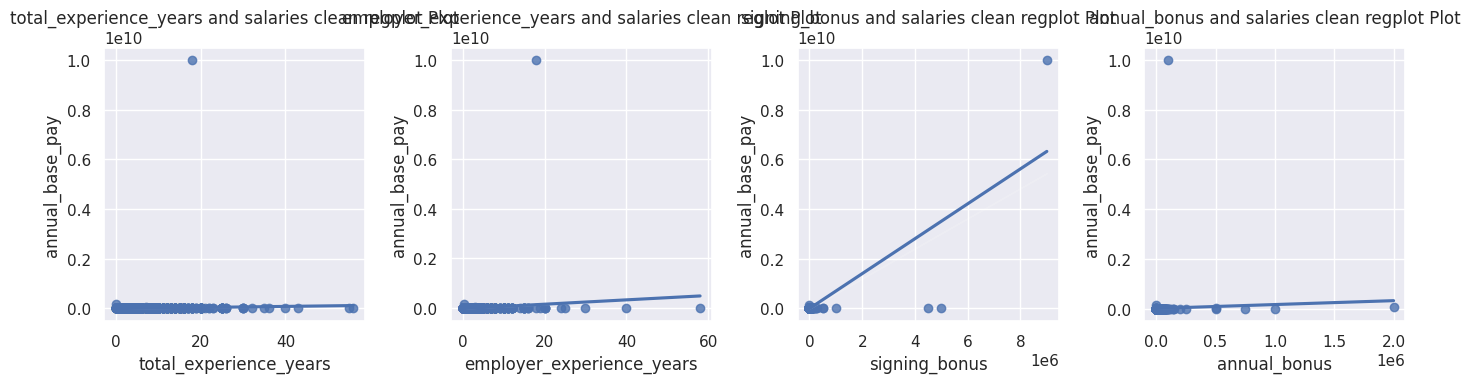

In [ ]:
# Check if data is normally distributed   (to check the relationship) before normalizing
def dataRelationship(dataframe, a,b,c,d):
    plt.figure(figsize = (14, 4))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 4, 1)
    sns.regplot(x = dataframe[a], y = dataframe['annual_base_pay'], ci = 0)
    plt.title(f"{a} and salaries clean regplot Plot")

    plt.subplot(1, 4, 2)
    sns.regplot(x = dataframe[b], y = dataframe['annual_base_pay'], ci = 0)
    plt.title(f"{b} and salaries clean reglot Plot")

    plt.subplot(1, 4, 3)
    sns.regplot(x = dataframe[c], y = dataframe['annual_base_pay'], ci = 0)
    plt.title(f"{c} and salaries clean regplot Plot")

    plt.subplot(1, 4, 4)
    sns.regplot(x = dataframe[d], y = dataframe['annual_base_pay'], ci = 0)
    plt.title(f"{d} and salaries clean regplot Plot")

dataRelationship(salary, 'total_experience_years', 'employer_experience_years',	'signing_bonus',	'annual_bonus',)
plt.tight_layout()
plt.show()

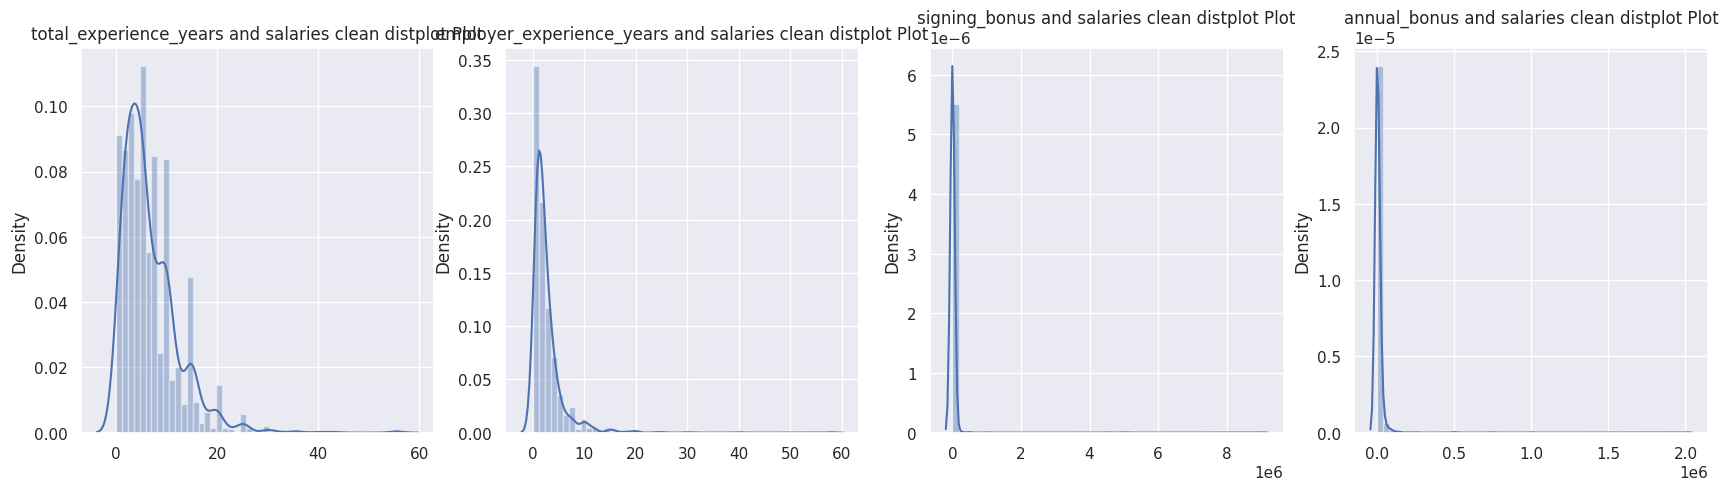

In [ ]:
def normalityChecker(dataframe, a,b,c,d):
  plt.figure(figsize = (21, 5))
  plt.subplot(1, 4, 1)
  sns.distplot(x = dataframe[a])
  plt.title(f"{a} and salaries clean distplot Plot")

  plt.subplot(1, 4, 2)
  sns.distplot(x = dataframe[b])
  plt.title(f"{b} and salaries clean distplot Plot")

  plt.subplot(1, 4, 3)
  sns.distplot(x = dataframe[c])
  plt.title(f"{c} and salaries clean distplot Plot")

  plt.subplot(1, 4, 4)
  sns.distplot(x = dataframe[d])
  plt.title(f"{d} and salaries clean distplot Plot")

normalityChecker(salary, 'total_experience_years', 'employer_experience_years',	'signing_bonus',	'annual_bonus',)
plt.show()

In [ ]:
remove_annual_base_pay = salary.drop('annual_base_pay', axis = 1)

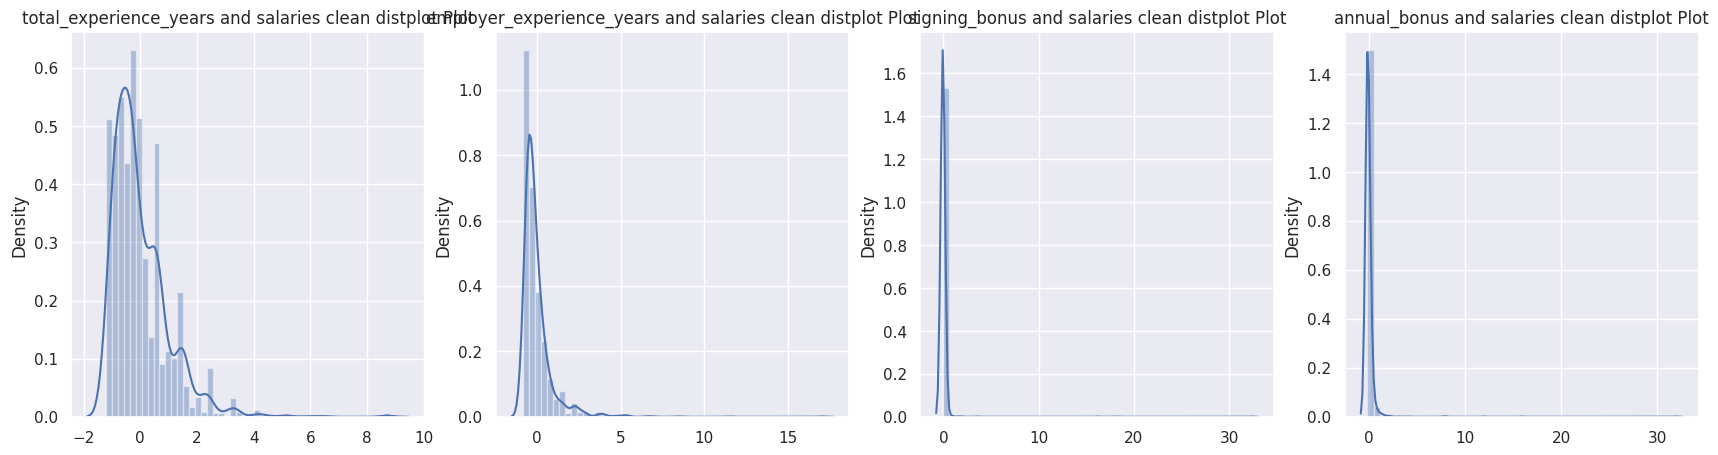

In [ ]:
# Normalization
for i in remove_annual_base_pay:
  remove_annual_base_pay[i] = normalizer.fit_transform(remove_annual_base_pay[[i]])
remove_annual_base_pay.head()
normalityChecker(remove_annual_base_pay, 'total_experience_years', 'employer_experience_years',	'signing_bonus',	'annual_bonus')

<Axes: >

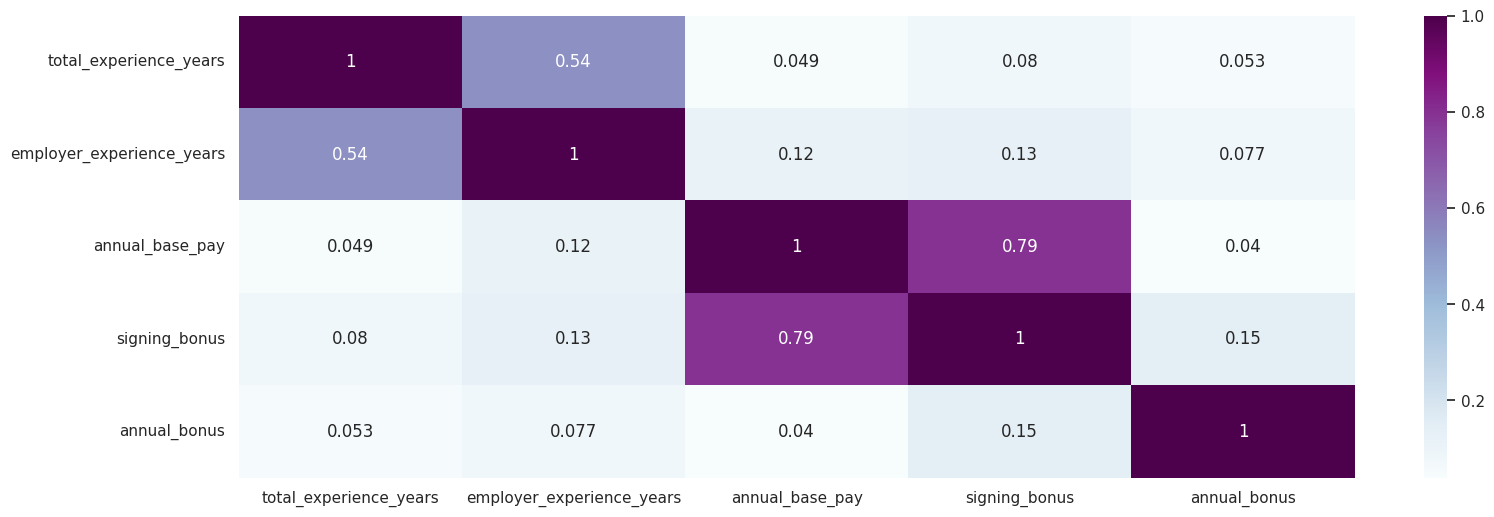

In [ ]:
#Check the Multi-Colinearity of the variables
plt.figure(figsize = (18, 6))
sns.heatmap(salary.corr(), annot =True, cmap = 'BuPu')

In [ ]:
# Feature selection
feature = salary[['employer_experience_years', 'signing_bonus', 'annual_base_pay']]

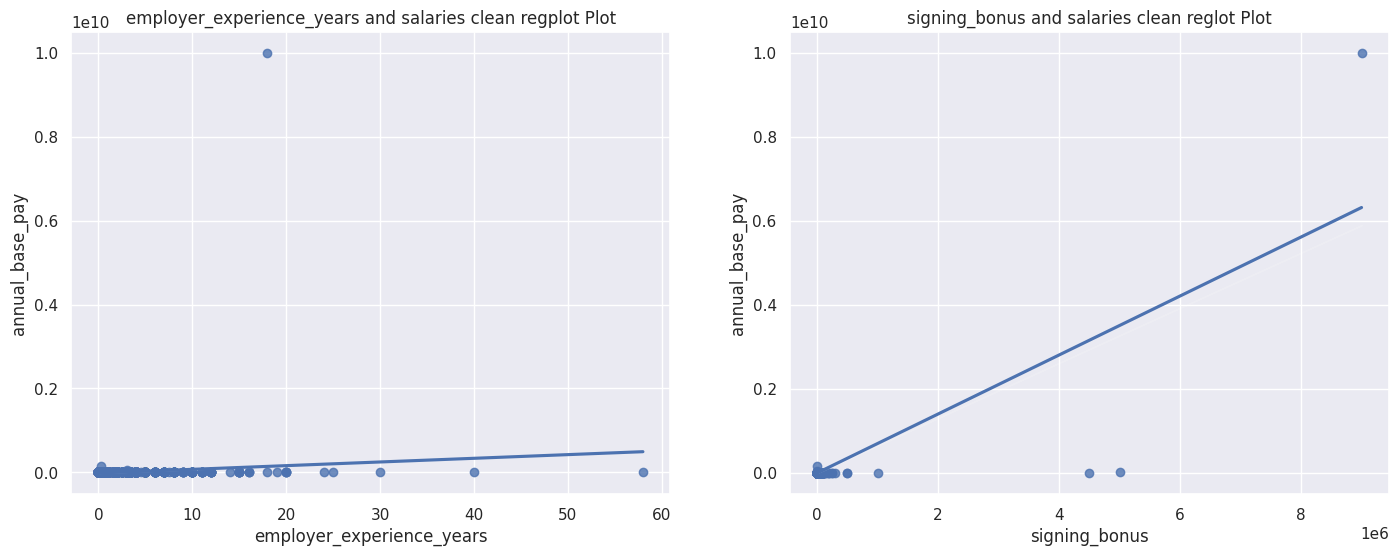

In [ ]:
# check the relationship
def dataRelationship(dataframe, a,b):
    plt.figure(figsize = (17, 6))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 2, 1)
    sns.regplot(x = dataframe[a], y = dataframe['annual_base_pay'], ci = 0)
    plt.title(f"{a} and salaries clean regplot Plot")

    plt.subplot(1, 2, 2)
    sns.regplot(x = dataframe[b], y = dataframe['annual_base_pay'], ci = 0)
    plt.title(f"{b} and salaries clean reglot Plot")


dataRelationship(feature, 'employer_experience_years','signing_bonus')
plt.show()


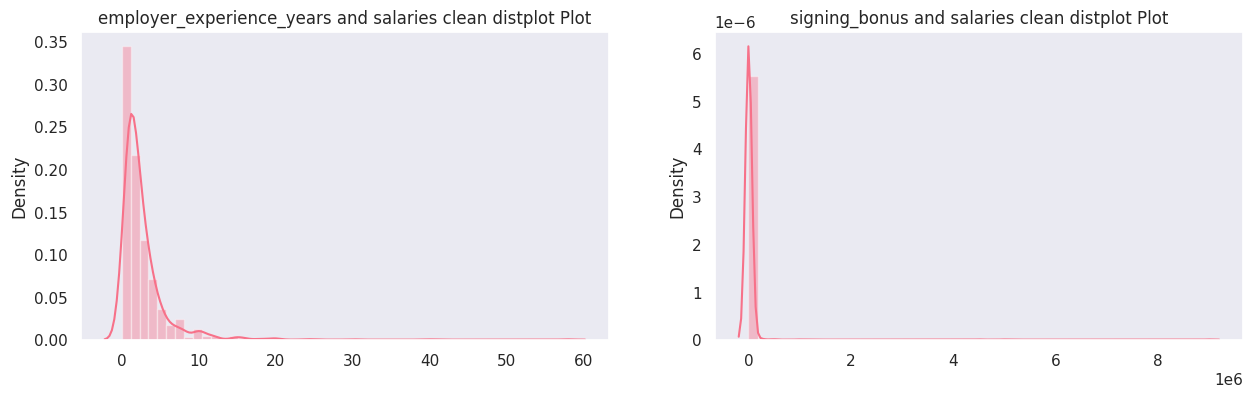

In [ ]:
def normalityChecker(dataframe, a,b):
  sns.set(style = 'dark', palette = 'husl')
  plt.figure(figsize = (15, 4))
  plt.subplot(1, 2, 1)
  sns.distplot(x = dataframe[a])
  plt.title(f"{a} and salaries clean distplot Plot")

  plt.subplot(1, 2, 2)
  sns.distplot(x = dataframe[b])
  plt.title(f"{b} and salaries clean distplot Plot")


normalityChecker(feature, 'employer_experience_years',	'signing_bonus')



<Axes: >

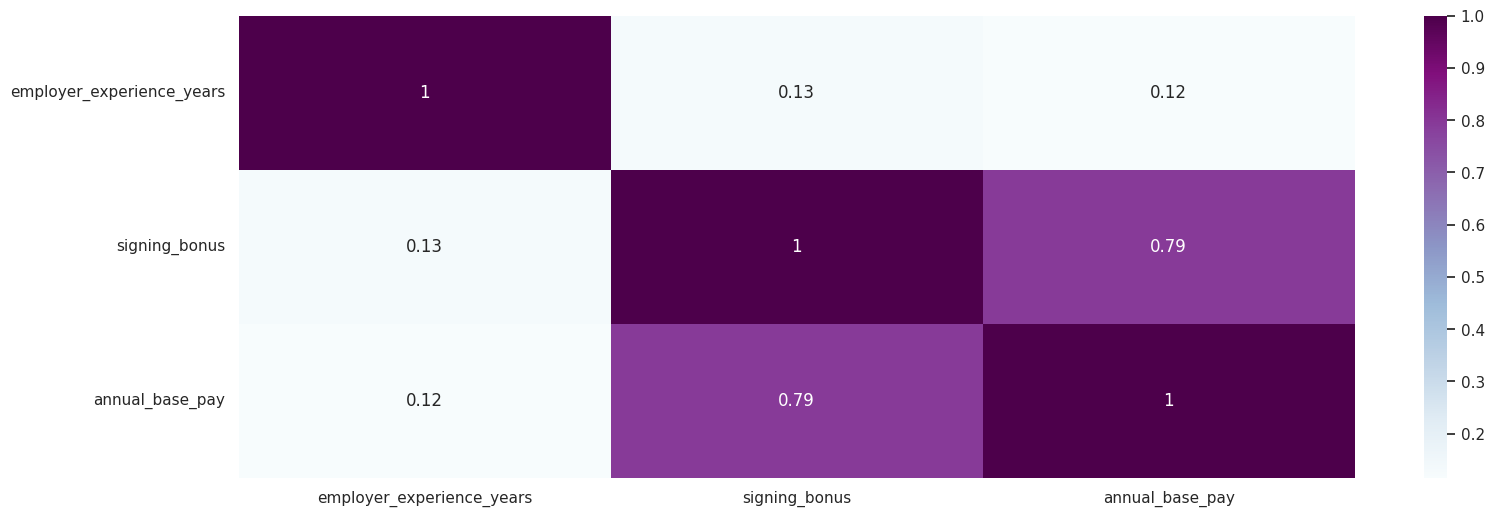

In [ ]:
#Check the Multi-Colinearity of the variables
plt.figure(figsize = (18, 6))
sns.heatmap(feature.corr(), annot =True, cmap = 'BuPu')

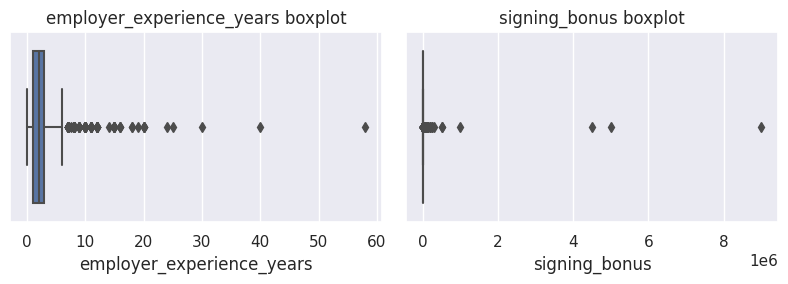

In [ ]:
#check for outliers
def outlier(dataframe, a,b):
    plt.figure(figsize = (12, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 3, 1)
    sns.boxplot(x = dataframe[a])
    plt.title(f"{a} boxplot")

    plt.subplot(1, 3, 2)
    sns.boxplot(x = dataframe[b])
    plt.title(f"{b} boxplot")

outlier(feature, 'employer_experience_years',	'signing_bonus')
plt.tight_layout()
plt.show()

In [ ]:
salary.describe()

,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
count,1655.000000,1655.000000,1.655000e+03,1.655000e+03,1.655000e+03
mean,6.706242,2.637529,6.309957e+06,1.803281e+04,9.602176e+03
std,5.613211,3.256409,2.458377e+08,2.780501e+05,6.234278e+04
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000,1.000000,6.107300e+04,0.000000e+00,0.000000e+00
50%,5.000000,2.000000,9.948000e+04,0.000000e+00,5.000000e+02
75%,10.000000,3.000000,1.300000e+05,3.000000e+03,7.130000e+03
max,56.000000,58.000000,1.000000e+10,8.999999e+06,2.000000e+06


In [ ]:
#------------------SPLIT INTO TRAIN AND TEST DATA---------------
from sklearn.model_selection import train_test_split

x = feature.drop('annual_base_pay', axis = 1)
y = feature.annual_base_pay

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.80)
print(f"xtrain size = {xtrain.shape}")
print(f"xtest size = {xtest.shape}")
print(f"ytrain size ={ytrain.shape}")
print(f"ytest size = {ytrain.shape}")

xtrain size = (1324, 2)
xtest size = (331, 2)
ytrain size =(1324,)
ytest size = (1324,)


In [ ]:
train_set = pd.concat([xtrain, ytrain], axis = 1)
test_set = pd.concat([xtest, ytest], axis = 1)

print('Train Set')
display(train_set.head())
print(f"\t\t{train_set.shape}\n\n")

print('Test Set')
display(test_set.head())
print(f"\t\t{test_set.shape}\n\n")

Train Set


,employer_experience_years,signing_bonus,annual_base_pay
1450,5.0,0.0,35000.0
882,2.0,0.0,30000.0
797,4.0,0.0,56000.0
626,1.0,0.0,27000.0
1045,3.0,0.0,120000.0


		(1324, 3)


Test Set


,employer_experience_years,signing_bonus,annual_base_pay
1573,1.00,30000.0,140000.0
1548,2.00,0.0,25000.0
269,3.00,0.0,157500.0
326,1.00,0.0,105000.0
331,3.75,0.0,164000.0


		(331, 3)




In [ ]:
# --------------------MODELING---------------------------
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)
y_train_prediction = linreg.predict(xtrain)
train_score = r2(y_train_prediction, ytrain) #--------to test the predicted and the actual y

# testing the model on the test set
y_test_prediction = linreg.predict(xtest)
test_score = r2(y_test_prediction, ytest)

print(f"The accuracy of the train set is: {train_score} which is equal to {(train_score * 100):.1f}%")
print(f"The accuracy of the test set is: {test_score} which is equal to {(test_score * 100):.1f}%")

The accuracy of the train set is: 0.41916138511390555 which is equal to 41.9%
The accuracy of the test set is: -0.01722760371817489 which is equal to -1.7%


In [ ]:
new_data = pd.DataFrame({'Actual Value': ytest, 'Predicted value': y_test_prediction, 'Difference': abs(y_test_prediction - ytest)})
new_data

,Actual Value,Predicted value,Difference
1573,140000.0,1.226043e+07,1.212043e+07
1548,25000.0,-7.556863e+06,7.581863e+06
269,157500.0,-6.324647e+06,6.482147e+06
326,105000.0,-8.789079e+06,8.894079e+06
331,164000.0,-5.400485e+06,5.564485e+06
...,...,...,...
931,28359.0,-7.556863e+06,7.585222e+06
256,80000.0,-8.789079e+06,8.869079e+06
1595,800000.0,2.050915e+07,1.970915e+07
1372,80000.0,-7.556863e+06,7.636863e+06


In [ ]:
print("Coefficients:", linreg.coef_)
print("Intercept:", linreg.intercept_)

Coefficients: [1.23221619e+06 7.01650243e+02]
Intercept: -10021295.207863547


<Axes: ylabel='Density'>

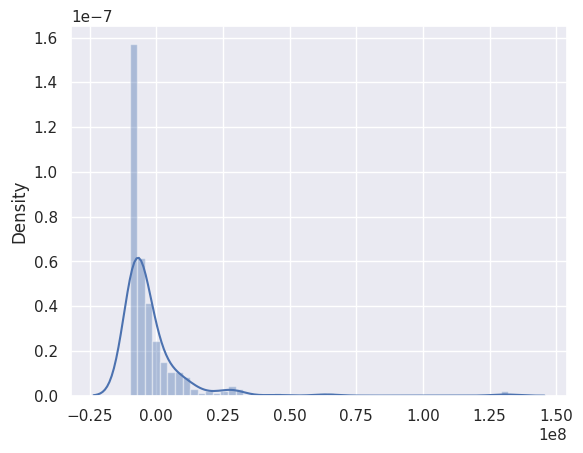

In [ ]:
 # Check for the Normality of the Model

sns.distplot(y_test_prediction)

Text(0.5, 1.0, 'Homoscedasticity of The Model')

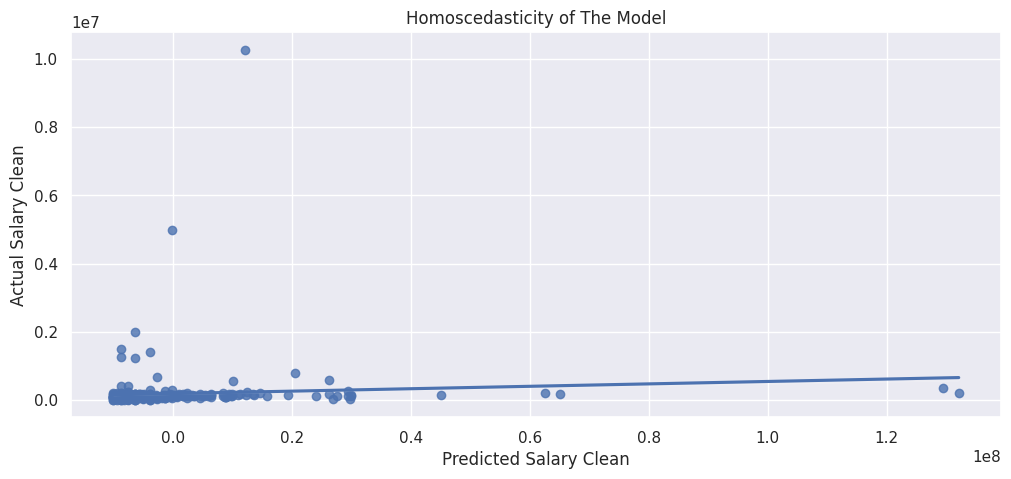

In [ ]:
# Check the Homoscedasticity of the Model

plt.figure(figsize = (12, 5))
sns.regplot(x = y_test_prediction, y = ytest, ci = 0)
plt.ylabel('Actual Salary Clean')
plt.xlabel('Predicted Salary Clean')
plt.title('Homoscedasticity of The Model')

# **CALIFORNIA HOUSING PREDICTION**

In [ ]:
data2 = pd.read_csv('/content/sample_data/california_housing_train.csv')

# CREATE A MODEL THAT PREDICTS THE "MEDIAN HOUSE VALUE" OF HOUSES IN CALIFORNIA

In [ ]:
house_train = data2.copy()
house_train.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0


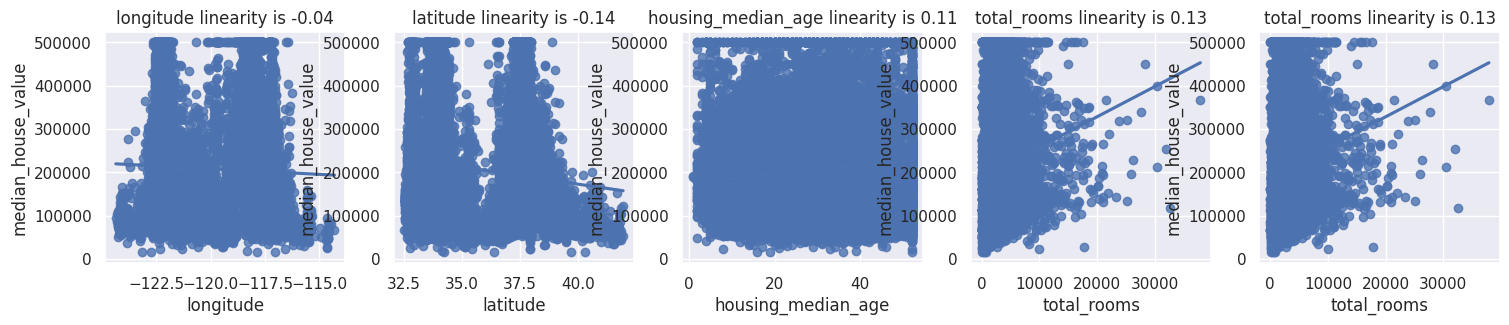

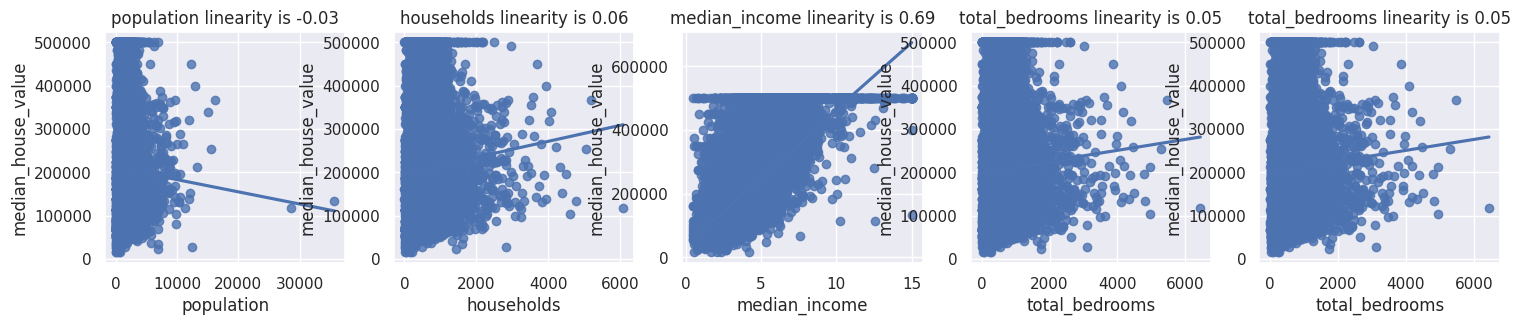

In [ ]:
# Assumption of Linearity
# check for relationship
# Check if data is normally distributed
def LinearityChecker(dataframe, a,b,c,d):
    plt.figure(figsize = (18, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 5, 1)
    sns.regplot(x = dataframe[a], y = dataframe['median_house_value'], ci = 0)
    plt.title(f"{a} linearity is {dataframe[a].corr(dataframe['median_house_value']).round(2)}")

    plt.subplot(1, 5, 2)
    sns.regplot(x = dataframe[b], y = dataframe['median_house_value'], ci = 0)
    plt.title(f"{b} linearity is {dataframe[b].corr(dataframe['median_house_value']).round(2)}")

    plt.subplot(1, 5, 3)
    sns.regplot(x = dataframe[c], y = dataframe['median_house_value'], ci = 0)
    plt.title(f"{c} linearity is {dataframe[c].corr(dataframe['median_house_value']).round(2)}")

    plt.subplot(1, 5, 4)
    sns.regplot(x = dataframe[d], y = dataframe['median_house_value'], ci = 0)
    plt.title(f"{d} linearity is {dataframe[d].corr(dataframe['median_house_value']).round(2)}")

    plt.subplot(1, 5, 5)
    sns.regplot(x = dataframe[d], y = dataframe['median_house_value'], ci = 0)
    plt.title(f"{d} linearity is {dataframe[d].corr(dataframe['median_house_value']).round(2)}")

LinearityChecker(house_train, 'longitude', 'latitude', 'housing_median_age', 'total_rooms')
LinearityChecker(house_train, 'population', 'households', 'median_income', 'total_bedrooms')

<Axes: >

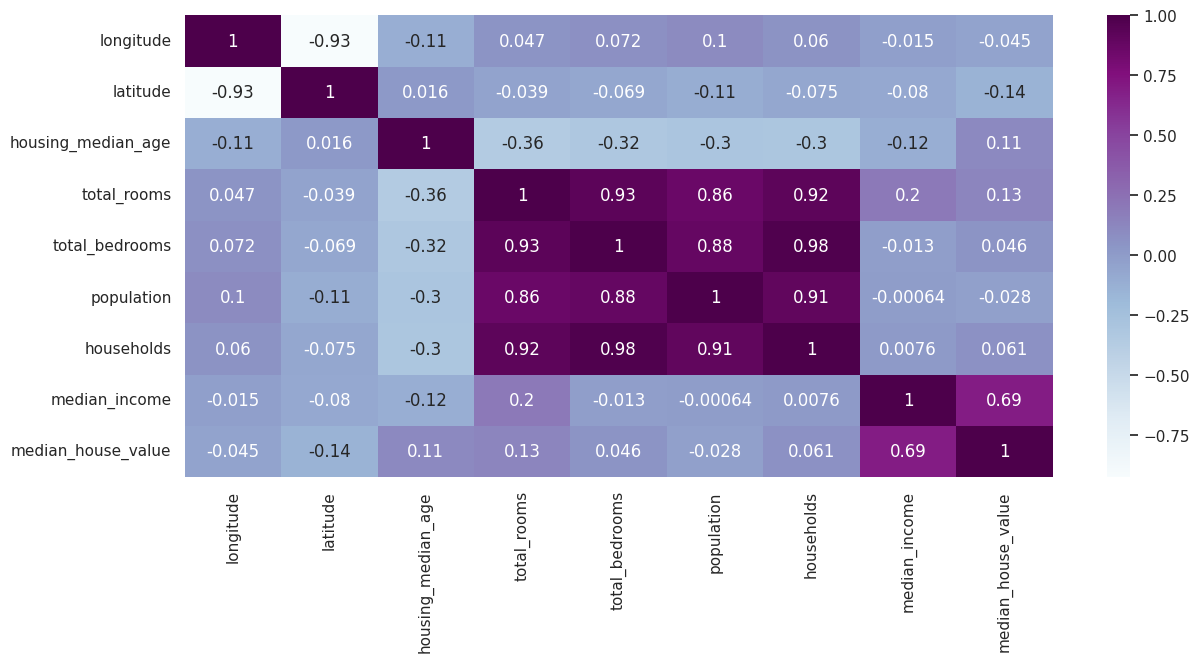

In [ ]:
plt.figure(figsize = (14, 6))
sns.heatmap(house_train.corr(), annot = True, cmap = 'BuPu')

<Axes: >

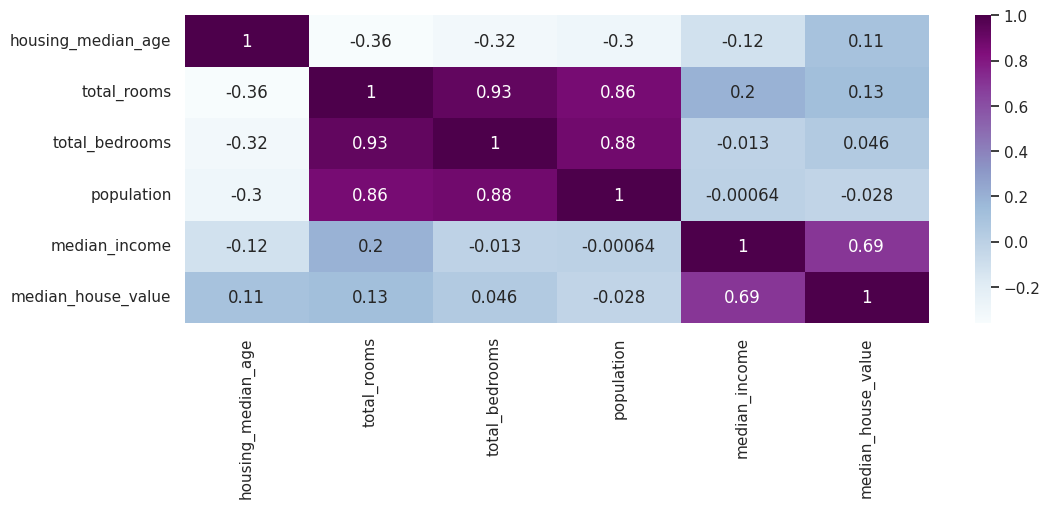

In [ ]:
plt.figure(figsize = (12, 4))
house_train.drop(['households', 'longitude', 'latitude'], axis = 1, inplace = True)
sns.heatmap(house_train.corr(), annot = True, cmap = 'BuPu')

In [ ]:
# Standardize the Dataset
from sklearn.preprocessing import StandardScaler

def standardizer(dataframe):
    scaler = StandardScaler()
    x = dataframe.drop('median_house_value', axis = 1) # ----------- Drop the target column and save the remaining in a temporal holder
    for i in x.columns:
        if i in dataframe.columns:
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]])
    return dataframe

standardizer(house_train)
house_train.head(3)

,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
0,-1.079671,1.361695,1.764204,-0.361184,-1.252543,66900.0
1,-0.761872,2.296608,3.230441,-0.261865,-1.081483,80100.0
2,-0.920772,-0.882462,-0.866956,-0.955354,-1.170105,85700.0


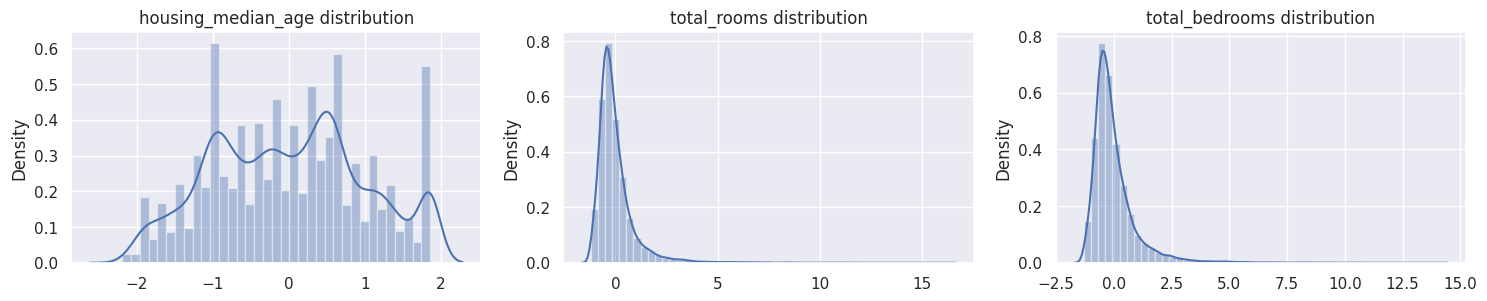

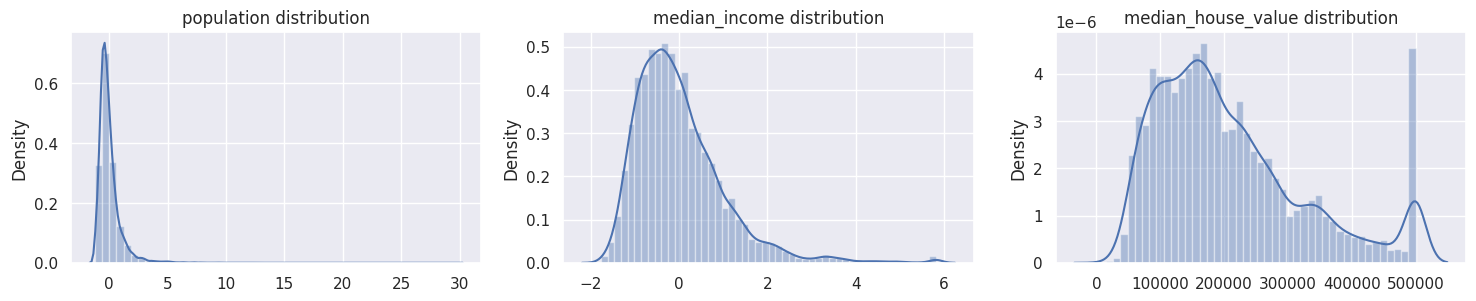

In [ ]:
# ------------- NORMALIZE THE DATA ---------------
# Check for normality of the Data using Distribution plot

def normalityChecker(dataframe, a,b,c):
    plt.figure(figsize = (18, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 3, 1)
    sns.distplot(x = dataframe[a])
    plt.title(f"{a} distribution")

    plt.subplot(1, 3, 2)
    sns.distplot(x = dataframe[b])
    plt.title(f"{b} distribution")

    plt.subplot(1, 3, 3)
    sns.distplot(x = dataframe[c])
    plt.title(f"{c} distribution")

normalityChecker(house_train, 'housing_median_age',	'total_rooms',	'total_bedrooms')
normalityChecker(house_train, 'population',	'median_income',	'median_house_value')

# **OUTLIER REMOVAL**